<a href="https://colab.research.google.com/github/dchatterjee/control.vehicle-control/blob/main/velocity_control_PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython import display

In [2]:
animate=True

In [3]:
def vehicle(v,t,u,load):
    # inputs
    #  v    = vehicle velocity (m/s)
    #  t    = time (sec)
    #  u    = gas pedal position (-50% to 100%)
    #  load = passenger load + cargo (kg)
    Cd = 0.24    # drag coefficient
    rho = 1.225  # air density (kg/m^3)
    A = 5.0      # cross-sectional area (m^2)
    Fp = 30      # thrust parameter (N/%pedal)
    m = 500      # vehicle mass (kg)
    # calculate derivative of the velocity
    dv_dt = (1.0/(m+load)) * (Fp*u - 0.5*rho*Cd*A*v**2)
    return dv_dt

In [4]:
tf = 60.0                 # final time for simulation
nsteps = 61               # number of time steps
delta_t = tf/(nsteps-1)   # how long is each time step?
ts = np.linspace(0,tf,nsteps) # linearly spaced time vector

In [5]:
# simulate step test operation
step = np.zeros(nsteps) # u = valve % open
step[11:] = 50.0       # step up pedal position
# passenger(s) + cargo load
load = 200.0 # kg
# velocity initial condition
v0 = 0.0
# set point
sp = 25.0
# for storing the results
vs = np.zeros(nsteps)
sps = np.zeros(nsteps)

In [6]:
plt.figure(1,figsize=(5,4))
if animate:
    plt.ion()
    plt.show()

<Figure size 360x288 with 0 Axes>

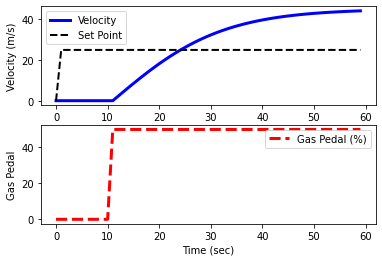

In [7]:
# simulate with ODEINT
for i in range(nsteps-1):
    u = step[i]
    # clip inputs to -50% to 100%
    if u >= 100.0:
        u = 100.0
    if u <= -50.0:
        u = -50.0
    v = odeint(vehicle,v0,[0,delta_t],args=(u,load))
    v0 = v[-1]   # take the last value
    vs[i+1] = v0 # store the velocity for plotting
    sps[i+1] = sp

    # plot results
    if animate:
        display.clear_output(wait=True)
        plt.clf()
        plt.subplot(2,1,1)
        plt.plot(ts[0:i+1],vs[0:i+1],'b-',linewidth=3)
        plt.plot(ts[0:i+1],sps[0:i+1],'k--',linewidth=2)
        plt.ylabel('Velocity (m/s)')
        plt.legend(['Velocity','Set Point'],loc=2)
        plt.subplot(2,1,2)
        plt.plot(ts[0:i+1],step[0:i+1],'r--',linewidth=3)
        plt.ylabel('Gas Pedal')    
        plt.legend(['Gas Pedal (%)'])
        plt.xlabel('Time (sec)')
        plt.pause(0.1)    

In [8]:
if not animate:
    # plot results
    plt.subplot(2,1,1)
    plt.plot(ts,vs,'b-',linewidth=3)
    plt.plot(ts,sps,'k--',linewidth=2)
    plt.ylabel('Velocity (m/s)')
    plt.legend(['Velocity','Set Point'],loc=2)
    plt.subplot(2,1,2)
    plt.plot(ts,step,'r--',linewidth=3)
    plt.ylabel('Gas Pedal')    
    plt.legend(['Gas Pedal (%)'])
    plt.xlabel('Time (sec)')
    plt.show()